MNIST DATASET WITH DEEP LEARNING

In [27]:
import tensorflow as tf
from IPython.display import Markdown, display

In [12]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

The features data are between 0 and 255, and we will normalize this to improve optimization performance.

In [13]:
x_train, x_test = x_train / 255.0, x_test / 255.0

In [14]:
print("categorical labels")
print(y_train[0:5])

# make labels one hot encoded
y_train = tf.one_hot(y_train, 10)
y_test = tf.one_hot(y_test, 10)

print("one hot encoded labels")
print(y_train[0:5])

categorical labels
[5 0 4 1 9]
one hot encoded labels
tf.Tensor(
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]], shape=(5, 10), dtype=float32)


In [15]:
print("number of training examples:" , x_train.shape[0])
print("number of test examples:" , x_test.shape[0])

number of training examples: 60000
number of test examples: 10000


In [19]:
train_ds = tf.data.Dataset.from_tensor_slices((x_train, y_train)).batch(50)
test_ds = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(50)

Converting a 2D Image into a 1D Vector
MNIST images are black and white thumbnail square images with 28x28 pixels. Each pixel is assigned an intensity (originally on a scale of 0 to 255). To make the input useful to us, we need these to be arranged in a 1D vector using a consistent strategy. We can use Flatten to accomplish this task.

In [20]:
# showing an example of the Flatten class and operation
from tensorflow.keras.layers import Flatten
flatten = Flatten(dtype='float32')

"original data shape"
print(x_train.shape)

"flattened shape"
print(flatten(x_train).shape)

(60000, 28, 28)
(60000, 784)


NOTE: tf.Variable creates adjustable variables that are in the global namespace, so any function that references these variables need not pass the varibles. But they are globals, so exercise caution when naming!

In [21]:
# Weight tensor
W = tf.Variable(tf.zeros([784, 10], tf.float32))
# Bias tensor
b = tf.Variable(tf.zeros([10], tf.float32))

In [22]:
def forward(x):
    return tf.matmul(x,W) + b

In [24]:
def activate(x):
    return tf.nn.softmax(forward(x))

In [25]:
def model(x):
    x = flatten(x)
    return activate(x)


$$ CrossEntropy = \sum{y\_{Label}\cdot \log(y\_{Prediction})}$$

In [26]:
#cost fn
def cross_entropy(y_label, y_pred):
    return (-tf.reduce_sum(y_label * tf.math.log(y_pred + 1.e-10)))
    # addition of 1e-10 to prevent errors in zero calculations

# current loss function for unoptimized model
cross_entropy(y_train, model(x_train)).numpy()

138155.12

OPTIMIZATION

In [34]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.001)

 This step uses GradientTape to automatically compute deriviatives of the functions we have manually created and applies them using the SGD optimizer.

In [35]:
def train_step(x, y ):
    with tf.GradientTape() as tape:
        #compute loss function
        current_loss = cross_entropy( y, model(x))
        # compute gradient of loss 
        #(This is automatic! Even with specialized funcctions!)
        grads = tape.gradient( current_loss , [W,b] )
        # Apply SGD step to our Variables W and b
        optimizer.apply_gradients( zip( grads , [W,b] ) )     
    return current_loss.numpy()

We have already divided our full dataset into batches of 50 each using the Datasets API. Now we can iterate through each of those batches to compute a gradient. Once we iterate through all of the batches in the dataset, we complete an epoch, or a full traversal of the dataset.

In [36]:
# zeroing out weights in case you want to run this cell multiple times
# Weight tensor
W = tf.Variable(tf.zeros([784, 10],tf.float32))
# Bias tensor
b = tf.Variable(tf.zeros([10],tf.float32))

loss_values=[]
accuracies = []
epochs = 10

for i in range(epochs):
    j=0
    # each batch has 50 examples
    for x_train_batch, y_train_batch in train_ds:
        j+=1
        current_loss = train_step(x_train_batch, y_train_batch)
        if j%500==0: #reporting intermittent batch statistics
            print("epoch ", str(i), "batch", str(j), "loss:", str(current_loss) ) 
    
    # collecting statistics at each epoch...loss function and accuracy
    #  loss function
    current_loss = cross_entropy( y_train, model( x_train )).numpy()
    loss_values.append(current_loss)
    correct_prediction = tf.equal(tf.argmax(model(x_train), axis=1),
                                  tf.argmax(y_train, axis=1))
    #  accuracy
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32)).numpy()
    accuracies.append(accuracy)
    print("end of epoch ", str(i), "loss", str(current_loss), "accuracy", str(accuracy) ) 


epoch  0 batch 500 loss: 28.665989
epoch  0 batch 1000 loss: 27.507881
end of epoch  0 loss 22962.766 accuracy 0.89281666
epoch  1 batch 500 loss: 22.354534
epoch  1 batch 1000 loss: 23.874119
end of epoch  1 loss 20418.535 accuracy 0.90328336
epoch  2 batch 500 loss: 20.409216
epoch  2 batch 1000 loss: 21.959023
end of epoch  2 loss 19285.295 accuracy 0.9094167
epoch  3 batch 500 loss: 19.352196
epoch  3 batch 1000 loss: 20.689417
end of epoch  3 loss 18603.152 accuracy 0.91258335
epoch  4 batch 500 loss: 18.679564
epoch  4 batch 1000 loss: 19.761406
end of epoch  4 loss 18133.281 accuracy 0.91443336
epoch  5 batch 500 loss: 18.216602
epoch  5 batch 1000 loss: 19.042202
end of epoch  5 loss 17783.176 accuracy 0.9163
epoch  6 batch 500 loss: 17.881506
epoch  6 batch 1000 loss: 18.46171
end of epoch  6 loss 17508.406 accuracy 0.9176
epoch  7 batch 500 loss: 17.629894
epoch  7 batch 1000 loss: 17.978693
end of epoch  7 loss 17284.656 accuracy 0.9186
epoch  8 batch 500 loss: 17.435404
epo

In [37]:
correct_prediction_train = tf.equal(tf.argmax(model(x_train), axis=1),tf.argmax(y_train,axis=1))
accuracy_train = tf.reduce_mean(tf.cast(correct_prediction_train, tf.float32)).numpy()

correct_prediction_test = tf.equal(tf.argmax(model(x_test), axis=1),tf.argmax(y_test, axis=1))
accuracy_test = tf.reduce_mean(tf.cast(correct_prediction_test, tf.float32)).numpy()

print("training accuracy", accuracy_train)
print("test accuracy", accuracy_test)

training accuracy 0.9205
test accuracy 0.9205


Text(0, 0.5, 'loss')

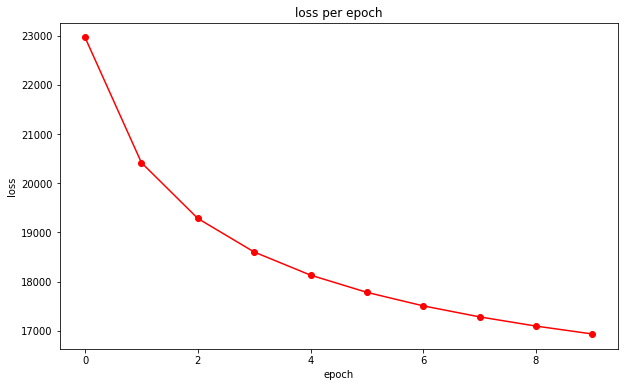

In [38]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)
#print(loss_values)
plt.plot(loss_values,'-ro')
plt.title("loss per epoch")
plt.xlabel("epoch")
plt.ylabel("loss")

Text(0, 0.5, 'accuracy')

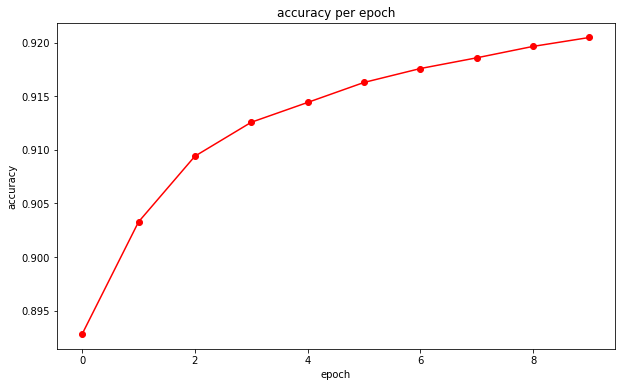

In [39]:
plt.plot(accuracies,'-ro')
plt.title("accuracy per epoch")
plt.xlabel("epoch")
plt.ylabel("accuracy")